Support Vector Machine (SVM)
==

Los algoritmo SVMs (*Support Vector Machines*) son un conjunto de metodos de aprendizaje automático supervisado usados para clasificación, regresión y detección de anomalias (*outliers*).

Entre las ventajas de esta familia de algoritmos se encuentran:

- Utiles para problemas de dimensionalidad alta.
- Utiles cuando el numero de muestras de entrenamiento es relativamente bajo comparado con la dimensionalidad del problema. es eficiente en el uso de memoria.
- Usa solo un sub-conjunto de puntos de entramiento para la funcion de decision, por lo que es eficiente en el uso de memoria.


Sin embargo, los clasificacores SVM necesitan de algun metodo de regularizacion cuando el numero de *features* es mucho mas grande que el numero de muestras de entrenamiento. Ademas la salida del modelo puede ser dificil de intrepretar ya que en el caso mas basico, no es directamente una probabilidad.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

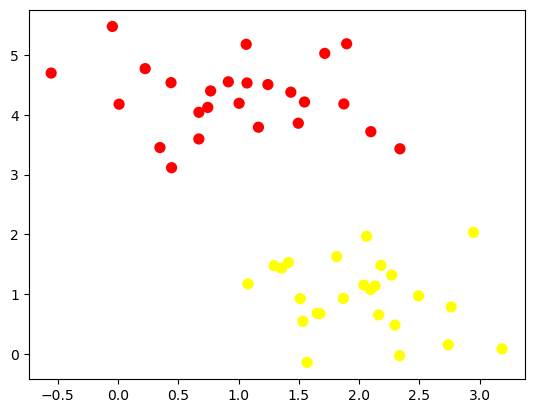

In [8]:
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60) #dispersion 0.6
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');# coloreados por etiquetas

In [9]:
model = svm.SVC(kernel='linear', C=1E10) # importamos el modelo svm, C regulariza, sirve para equilibrar la solucion
# la solucion C controla el margen minimo de clasificacion conviene probar con diferetnes valores
# el valor por default es 1
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True): # definimos esta funcion de decision
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

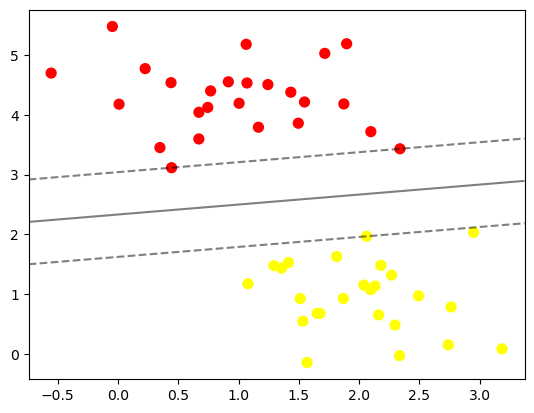

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

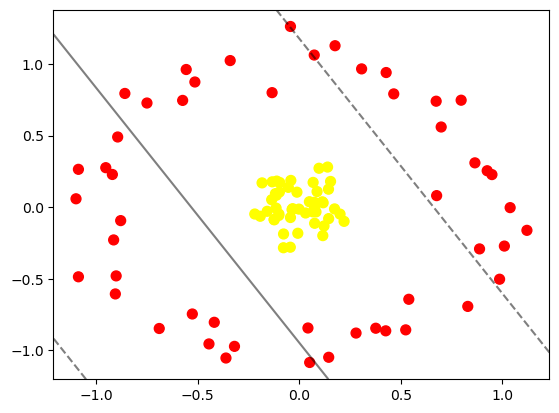

In [12]:
X, y = datasets.make_circles(100, factor=.1, noise=.1) # con make circles hace distrubucion circular

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [13]:
clf = svm.SVC(kernel='rbf', C=1E6)# radial basic funcion, se clasifica con un nuevo plano y es muy util
clf.fit(X, y)

SVC(C=1000000.0)

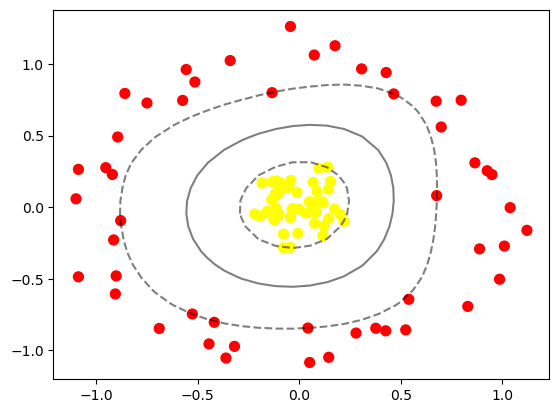

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

SGD
==

*scikit-learn* nos ofrece tambien la clase SGD (*Stochastic Gradient Descent*) la cual conglomera distintos clasificadores lineales en una sola herramienta.

La clase SGD no se asocia a una familia especifica de clasificadores, si no que a un metodo de optmizacion en el entrenamiento (**gradiente descendiente estocastico**) y nos permite entrenar modelos con diferentes clasificadores.

Por ejemplo, usar **SGDClassifier**(loss='log') resulta en un clasificador por regresion logistica, equivalente a utilizar la clase **LogisticRegression**().

La utilidad de esta clase esta en su eficiencia de computo para problemas grandes, y en la habilidad de facilmente comparar el resultado de diferentes clasificadores en pocas lineas de codigo.

C:\Users\herna\AppData\Local\Temp\ipykernel_20724\2591792476.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


(-2.8700241338470187, 3.489975866152987, -3.433947141908086, 4.086052858091921)

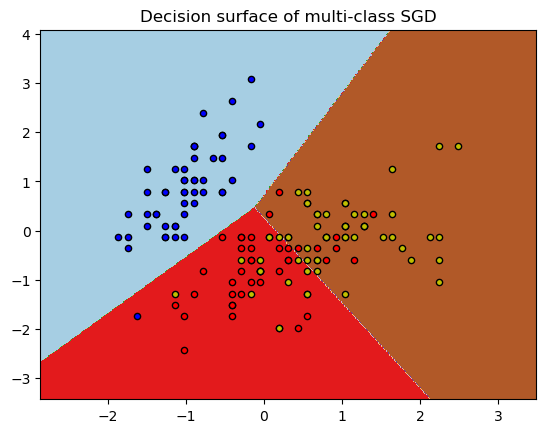

In [23]:
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(loss="log_loss", alpha=0.001, max_iter=100).fit(X, y) # loss='hinge or log'

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')